In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:\\Users\\Patty\\Desktop\\Patricia\\BBS Data science\\Data Mining\\3XDataMining-master\\data.csv", sep=',')

In [3]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,No


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

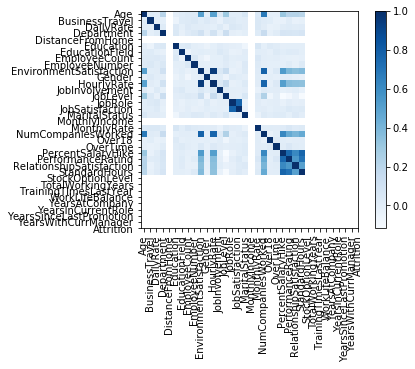

In [5]:
df.corr()

plt.imshow(df.corr(), cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(df.columns))]
plt.xticks(tick_marks, df.columns, rotation='vertical')
plt.yticks(tick_marks, df.columns)
plt.show()

In [6]:
X=df.drop(labels = ['Attrition', 'Over18'], axis = 1)
y=df['Attrition']
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [7]:
y=y.replace(['No','Yes'], [0,1])
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [8]:
X['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [9]:
X['BusinessTravel']=X['BusinessTravel'].replace(['Non-Travel','Travel_Rarely','Travel_Frequently'],[0,1,2])


In [10]:
X['Department']=X['Department'].replace(['Human Resources', 'Research & Development', 'Sales'],[0,1,2])

In [11]:
X['EducationField']=X['EducationField'].replace(['Human Resources','Life Sciences','Marketing', 'Medical', 'Other', 'Technical Degree'],[0,1,2,3,4,5])

In [12]:
X['Gender']=X['Gender'].replace(['Female','Male'],[0,1])

In [13]:
X['JobRole']=X['JobRole'].replace(['Healthcare Representative','Human Resources','Laboratory Technician','Manager','Manufacturing Director','Research Director','Research Scientist','Sales Executive','Sales Representative'],[0,1,2,3,4,5,6,7,8])

In [14]:
X['MaritalStatus']=X['MaritalStatus'].replace(['Divorced','Married','Single'],[0,1,2])

In [15]:
X['OverTime']=X['OverTime'].replace(['Yes','No'],[0,1])

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
Age                         1470 non-null int64
BusinessTravel              1470 non-null int64
DailyRate                   1470 non-null int64
Department                  1470 non-null int64
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null int64
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null int64
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null int64
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null int64
MonthlyIncome               1470 non-null int64
MonthlyRate                 1

In [17]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1, normalize=True)
lasso_coef = lasso.fit(X, y).coef_


In [18]:
names=X.columns

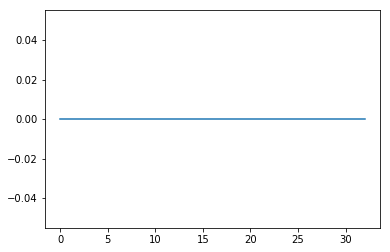

In [19]:
plt.plot(range(len(names)), lasso_coef)


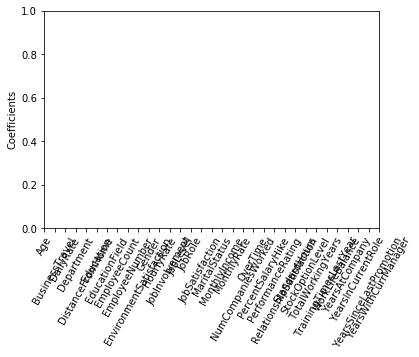

In [20]:
plt.xticks(range(len(names)), names, rotation=60)
plt.ylabel('Coefficients')
plt.show()